<a href="https://colab.research.google.com/github/yash-raj23/Car_Price_Prediction/blob/main/Old_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import pandas as pd

In [31]:
car_dataset = pd.read_csv("/content/car data.csv")

In [32]:
car_dataset.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [33]:
car_dataset.shape

(2095, 14)

In [34]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [35]:
car_dataset.isnull().sum()

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

In [41]:
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

Diesel    1075
Petrol    1000
CNG         19
LPG          1
Name: fuel, dtype: int64
Individual          1919
Dealer               169
Trustmark Dealer       7
Name: seller_type, dtype: int64
Manual       1996
Automatic      99
Name: transmission, dtype: int64


In [60]:
car_dataset.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3}},inplace=True)
car_dataset.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace=True)
car_dataset.replace({'transmission':{'Manual':0, 'Automatic': 1}},inplace=True)
#car_dataset.drop(['owner'],axis=1)

In [61]:
car_dataset.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,0,0,0,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,0,0,0,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,1,0,0,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,0,0,0,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,0,0,0,First Owner,5,68.10,kmpl,20.00,1399


In [69]:
X = car_dataset.drop(['selling_price','name','owner','Mileage Unit'],axis=1)
Y = car_dataset['selling_price']

In [70]:
print(X)

      Unnamed: 0  year  km_driven  fuel  seller_type  transmission  seats  \
0              0  2014     145500     0            0             0      5   
1              2  2010     127000     0            0             0      5   
2              4  2017      45000     1            0             0      5   
3              7  2011      90000     0            0             0      5   
4              8  2013     169000     0            0             0      5   
...          ...   ...        ...   ...          ...           ...    ...   
2090        6245  2017      12000     1            0             0      5   
2091        6246  2014      50000     0            0             0      5   
2092        6249  2011      73000     1            0             0      5   
2093        6253  2017      80000     1            0             0      5   
2094        6256  2014      80000     0            0             0      5   

      max_power (in bph)  Mileage  Engine (CC)  
0                  74.00  

In [71]:
print(Y)

0       450000
1       225000
2       440000
3       350000
4       200000
         ...  
2090    425000
2091    425000
2092    200000
2093    360000
2094    475000
Name: selling_price, Length: 2095, dtype: int64


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [83]:
lr = LinearRegression()

In [74]:
lr.fit(X_train,Y_train)

LinearRegression()

In [75]:
train_data_prediction = lr.predict(X_train)

In [76]:
error_score = metrics.r2_score(Y_train,train_data_prediction)
print("R2 Square error prediction: ",error_score)

R2 Square error prediction:  0.7362800233141924


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

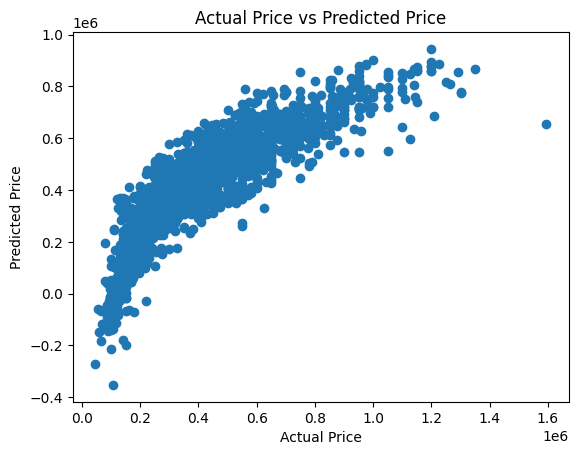

In [79]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

In [80]:
test_data_prediction = lr.predict(X_test)

In [81]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R2 Square error prediction: ",error_score)

R2 Square error prediction:  0.7474876174066136


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

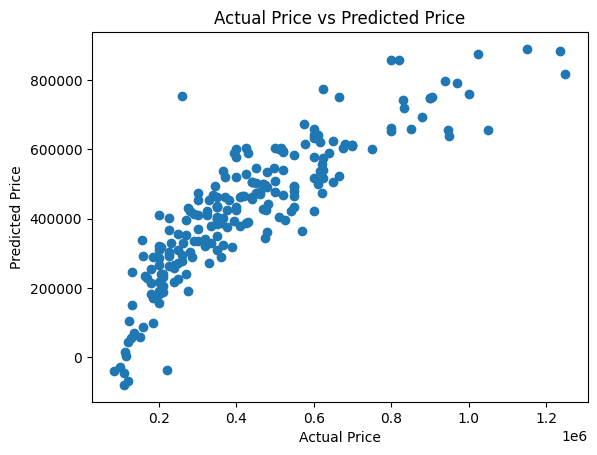

In [82]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

In [84]:
lasso = Lasso()

In [85]:
lasso.fit(X_train,Y_train)

Lasso()

In [86]:
train_data_prediction = lasso.predict(X_train)

In [89]:
error_score = metrics.r2_score(Y_train,train_data_prediction)
print("R2 Square error prediction: ",error_score)

R2 Square error prediction:  0.7362800222846815


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

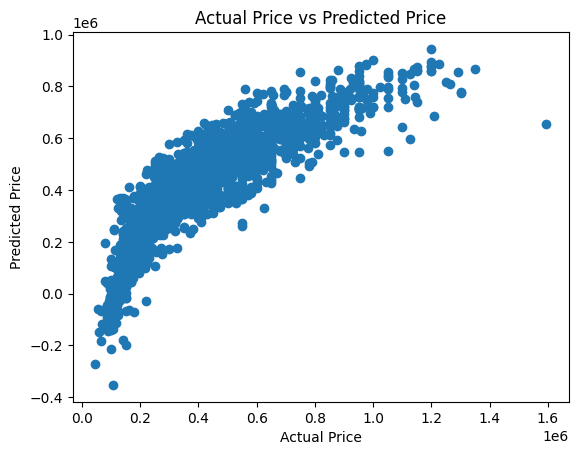

In [90]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

In [91]:
test_data_prediction = lasso.predict(X_test)

In [92]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R2 Square error prediction: ",error_score)

R2 Square error prediction:  0.7474897095996249


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

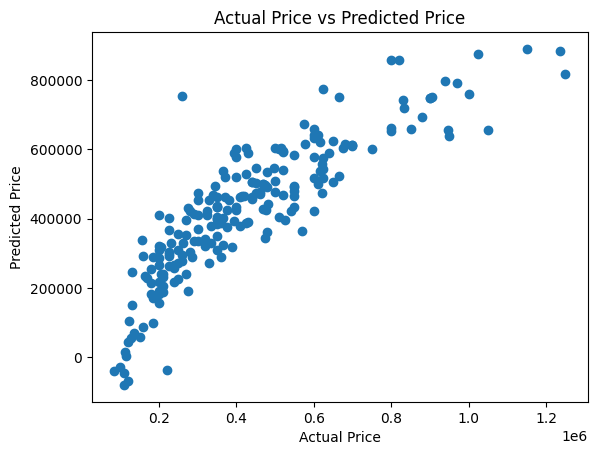

In [93]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")